#Aprendizaje no supervisado
El aprendizaje no supervisado (unsupervised learning) es una rama del Machine Learning en la que se exploran y descubren patrones y estructuras ocultas en los datos sin la guía de una variable objetivo o etiquetas previas. A diferencia del aprendizaje supervisado, donde se proporcionan ejemplos de entrada y sus correspondientes salidas deseadas para entrenar al modelo, en el aprendizaje no supervisado, el algoritmo se enfrenta a un conjunto de datos sin etiquetas y busca encontrar patrones interesantes o agrupar los datos en categorías sin una guía específica.

El objetivo principal del aprendizaje no supervisado es explorar la estructura inherente de los datos y extraer información valiosa sin que el modelo tenga conocimiento previo de las categorías o relaciones entre las variables.

Hay dos tipos principales de técnicas de aprendizaje no supervisado:

- **Agrupamiento**: Más conocido como clustering, su traducción al inglés, consiste en dividir el conjunto de datos en grupos (clusters) basados en similitudes o patrones en los datos. Los algoritmos de agrupamiento intentan agrupar observaciones similares en un mismo cluster y separar muestras diferentes en clusters diferentes.

- **Reducción de dimensionalidad (dimensionality reduction)**: El objetivo es reducir la cantidad de características o variables en el conjunto de datos sin perder información importante. Estas técnicas permiten representar los datos en un espacio de menor dimensión, facilitando la visualización y comprensión de la estructura de los datos.

El aprendizaje no supervisado tiene una amplia variedad de aplicaciones, como segmentación de clientes en marketing, detección de anomalías en datos, compresión de imágenes, agrupación de documentos en temas, entre otros. Es una herramienta poderosa para explorar y comprender la estructura intrínseca de los datos sin la necesidad de etiquetas o respuestas conocidas.

##Clustering
El clustering es una técnica del aprendizaje no supervisado que se utiliza para dividir un conjunto de datos en grupos basados en similitudes entre las observaciones. El objetivo es agrupar elementos similares en un mismo cluster y separar observaciones diferentes en clusters distintos, sin tener información previa sobre las categorías a las que pertenecen.

Existen varios algoritmos de clustering, pero los más comunes son:

- **K-Means**: Es uno de los algoritmos de clustering más populares. Se inicia definiendo K centroides (punto que representa el centro geométrico de un cluster) aleatorios, luego asigna cada punto de datos al centroide más cercano y recalcula los centroides como el promedio de los puntos asignados. Repite este proceso hasta que los centroides convergen.

- **Clustering jerárquico (Hierarchical Clustering)**: Comienza considerando que cada punto de datos es su propio cluster y fusiona gradualmente los clusters más cercanos en uno solo. Esto forma una jerarquía que se puede representar en un dendograma.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Agrupa puntos de datos que están cerca unos de otros y tienen suficientes vecinos en su vecindario. Permite encontrar clústeres de formas y tamaños irregulares y también detectar puntos atípicos.

##K-Means
El algoritmo K-Means es una técnica de agrupamiento que tiene como objetivo dividir un conjunto de datos en K clusters (definido como parámetro de entrada), de manera que los puntos dentro de cada clúster sean similares entre sí y diferentes a los puntos en otros clústeres.

Es un proceso iterativo compuesto de varios pasos:

1. **Inicialización**. El proceso comienza definiendo K puntos aleatorios del conjunto de datos como centroides iniciales. Los centroides son puntos representativos que servirán como los centros iniciales de cada cluster.

2. **Asignación de puntos a clusters**. Cada punto del conjunto de datos se asigna al cluster cuyo centroide es el más cercano. Esto se hace calculando la distancia entre cada punto y los centroides, y asignando el punto al cluster cuyo centroide tiene la distancia más pequeña. Las distancias utilizadas y disponibles son las que estudiamos en el módulo del modelo KNN y las puedes encontrar aquí.

3. **Actualización de centroides**. Una vez que todos los puntos están asignados a sus clusters correspondientes, los centroides se actualizan recalculando su posición como el promedio de todos los puntos asignados a ese cluster. Este paso reubica los centroides al centro geométrico de cada grupo.

4. **Iteración**. Se repiten los pasos 2 y 3 hasta que los centroides ya no cambian significativamente y los puntos están estables en sus clusters. Es decir, el algoritmo continúa asignando y actualizando puntos hasta que se alcanza la convergencia.

5. **Resultado**. Una vez que el algoritmo ha convergido, los puntos del conjunto de datos están agrupados en K clusters o grupos, y cada clusterestá representado por su centroide. Los grupos obtenidos representan conjuntos de puntos similares.

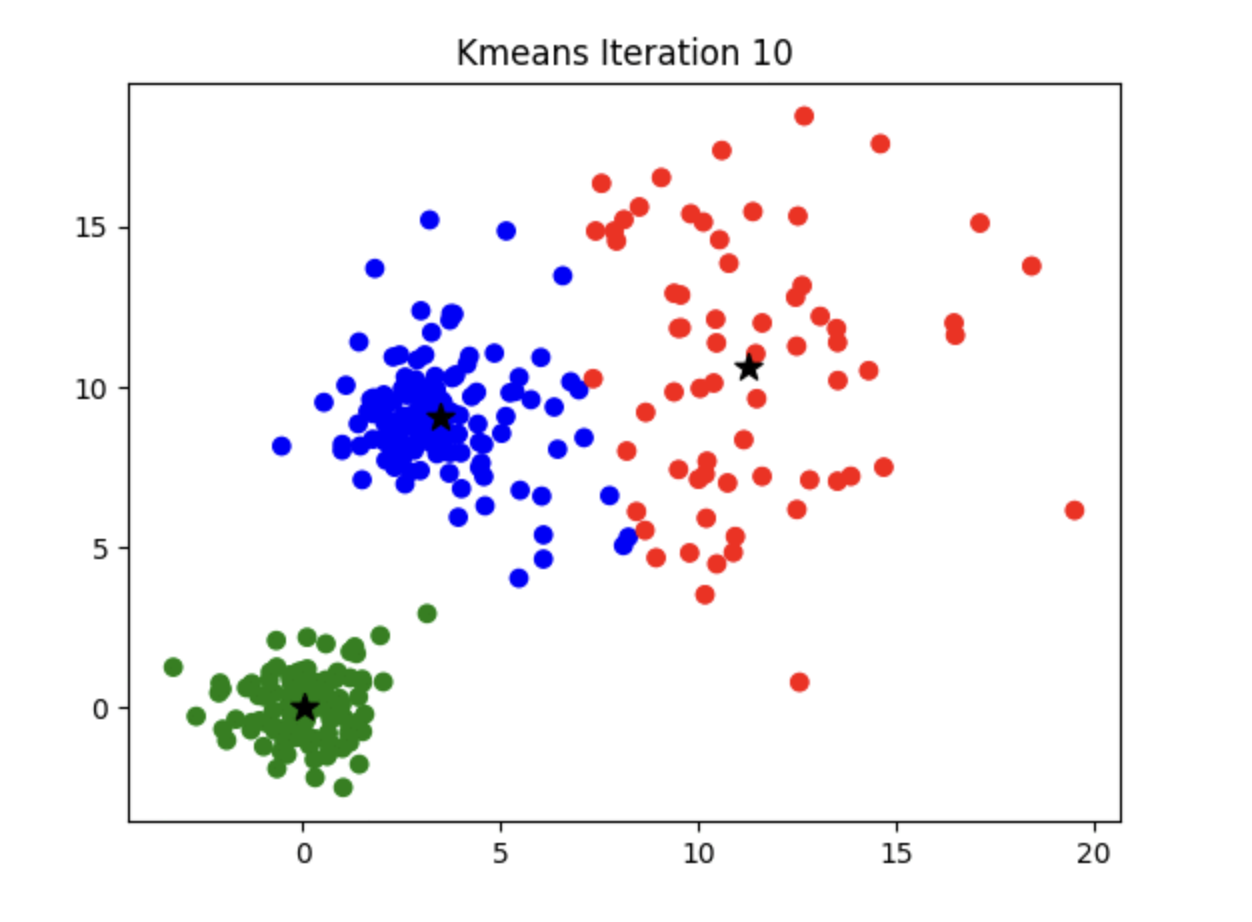

El reto de encontrar el K óptimo puede ser abordado mediante una optimización de hiperparámetros o mediante procedimientos más analíticos como el método del codo (elbow method), del que puedes encontrar más información aquí

Este algoritmo es rápido y efectivo para el agrupamiento de datos, pero depende mucho del reparto inicial de centroides y no siempre encuentra la mejor solución global. Por lo tanto, a veces se ejecuta varias veces con diferentes inicializaciones para evitar obtener soluciones subóptimas.

##Implementación
La implementación de este tipo de modelo es muy simple, y se lleva a cabo con la librería scikit-learn. Para ello, generaremos una muestra de ejemplo utilizando también esta librería:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


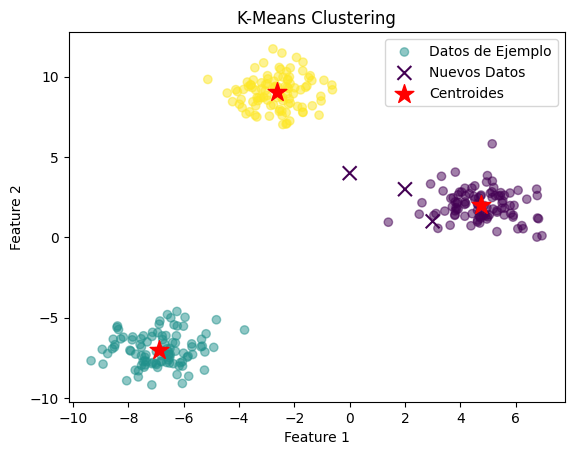

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Paso 1: Generación de Datos de Ejemplo
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Paso 2: Entrenamiento del Modelo K-Means
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

# Paso 3: Realizar predicciones con datos nuevos
new_data = np.array([[2, 3], [0, 4], [3, 1]])
predictions = model.predict(new_data)

# Visualización de los clusters y los nuevos datos
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis', alpha=0.5, label='Datos de Ejemplo')
plt.scatter(new_data[:, 0], new_data[:, 1], c=predictions, cmap='viridis', marker='x', s=100, label='Nuevos Datos')

# Centroides de los clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='*', s=200, label='Centroides')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

En este código de ejemplo generamos 3 clusters (hiperparámetro n_clusters) y establecemos la semilla ya que es un modelo con un componente de inicialización aleatorio.

Una vez hemos entrenado el modelo podemos obtener las etiquetas de qué cluster se asocia a cada punto con el atributo labels_ del modelo (model.labels_). También podemos obtener las coordenadas de los centroides de cada cluster con el atributo cluster_centers_ del modelo (model.cluster_centers_).

##Clustering jerárquico
El clustering jerárquico (Hierarchical Clustering) es una técnica de agrupamiento que organiza los datos en una jerarquía de clusters, donde los clusters más pequeños se combinan gradualmente para formar agrupaciones más grandes. El resultado final es un dendrograma, que es una representación gráfica de la jerarquía de clústeres.

Es un proceso iterativo compuesto de varios pasos:

1. **Inicialización**. Cada punto de datos se considera inicialmente como su propio cluster.

2. **Cálculo de la similitud**. Se calcula la similitud o distancia entre todos los pares de puntos de datos. Las distancias utilizadas y disponibles son las que estudiamos en el módulo del modelo KNN y las puedes encontrar aquí.

3. **Unión de clusters**. Los dos clusters más cercanos se combinan para formar uno nuevo más grande. La distancia entre dos clusters se puede calcular de muchas formas.

4. **Actualización de la matriz de similitud**. La matriz de similitud se actualiza para reflejar la distancia entre los nuevos clusters y los clusters restantes.

5. **Iteración**. Se repiten los pasos 3 y 4 hasta que todos los puntos de datos se encuentren en un único solo cluster o hasta que se alcance un número específico de grupos deseados (hiperparámetro de entrada).

6. **Dendograma**. El resultado del clustering jerárquico se muestra en un dendograma, que es un diagrama de árbol que muestra la jerarquía de los grupos. Los puntos de datos se encuentran en las hojas del árbo, y los clusters más grandes se forman combinando clusters más pequeños lo largo de las ramas del árbol.

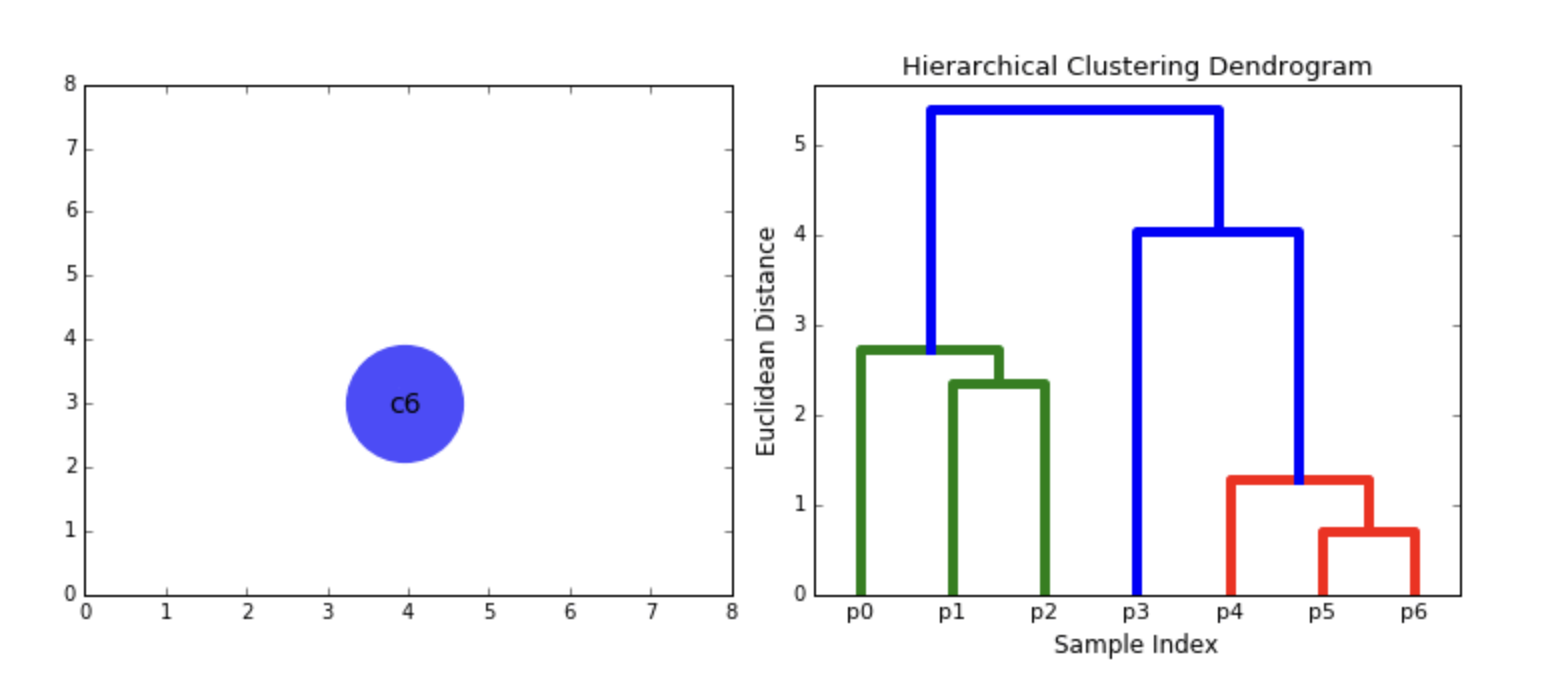

El dendrograma permite visualizar la estructura jerárquica de los clústeres y la distancia entre ellos. Los cortes horizontales en el dendrograma determinan la cantidad de clústeres obtenidos al cortar el árbol a una cierta altura.

El clustering jerárquico es útil cuando no se conoce el número óptimo de clústeres de antemano o cuando se desea explorar la estructura jerárquica de los datos. Sin embargo, puede ser computacionalmente costoso en conjuntos de datos grandes debido a la necesidad de calcular todas las distancias entre los puntos de datos.

###Implementación
La implementación de este tipo de modelo es muy simple, y se lleva a cabo con la librería scipy. Para ello, generaremos una muestra de ejemplo utilizando la librería scikit-learn:

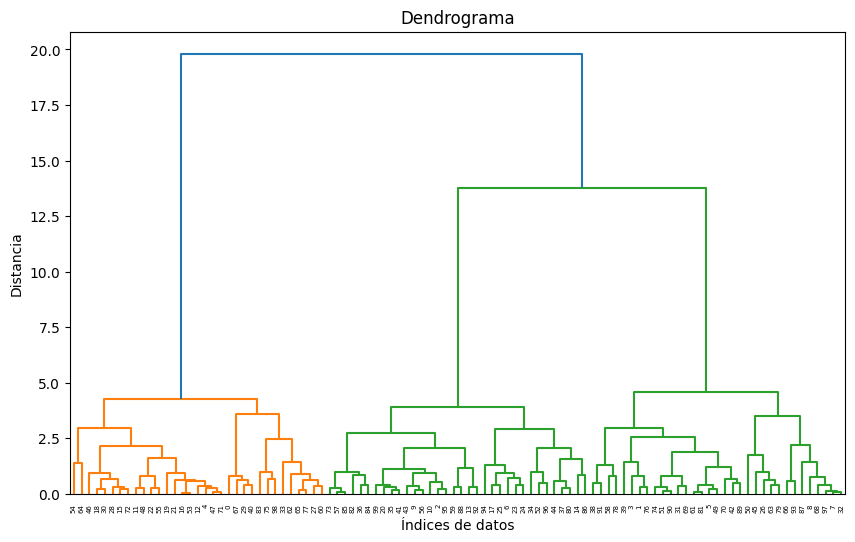

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Paso 1: Generar un conjunto de datos de ejemplo
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Paso 2: Calcular la matriz de similitud entre clusters
Z = linkage(X, method="complete")

# Paso 3: Mostrar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrograma")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()

También podríamos utilizar la librería scikit-learn para implementar este modelo, utilizando la función AgglomerativeClustering, pero hoy en día se utiliza más la versión de scipy debido a que es más intuitiva y fácil de utilizar.

##Reducción de dimensionalidad
La reducción de dimensionalidad (dimensionality reduction) es una técnica utilizada para disminuir la cantidad de características o variables en un conjunto de datos. El objetivo principal este modelo es simplificar la representación de los datos, manteniendo al mismo tiempo la mayor cantidad posible de información relevante.

En muchos conjuntos de datos, especialmente en aquellos con muchas características, puede haber redundancia o correlación entre las variables, lo que puede dificultar el análisis y la visualización. La reducción de dimensionalidad aborda este problema al transformar los datos originales en un espacio de menor dimensión, donde las nuevas variables (llamadas componentes principales o características latentes) representan una combinación de las variables originales.

Hay dos enfoques principales para la reducción de dimensionalidad:

- **Análisis de Componentes Principales (PCA, Principal Component Analysis)**: Es una técnica lineal que encuentra las direcciones de máxima varianza en los datos y proyecta los datos originales en un espacio de menor dimensión definido por las componentes principales. El objetivo es retener la mayor parte de la varianza en los datos mientras se reduce la dimensionalidad de los mismos.

- **Descomposición en Valores Singulares (SVD, Singular Value Decomposition)**: Es una técnica matemática utilizada para factorizar una matriz de datos en tres componentes: que luego se utilizan para reducir la dimensionalidad.
Existen muchos mmotivos por los cuales querríamos utilizar este tipo de modelos para simplificar los datos. Podemos destacar:

1. **Simplificación y visualización de datos**: En conjuntos de datos con muchas características, la reducción de dimensionalidad permite simplificar la representación de los datos y visualizarlos en espacios de menor dimensión. Esto facilita la interpretación y comprensión de los datos.

2. **Reducción de ruido**: Al reducir la dimensionalidad, se puede eliminar información redundante o ruidosa, lo que puede mejorar la calidad de los datos y el rendimiento de los modelos de aprendizaje automático.

3. **Eficiencia computacional**: Conjuntos de datos con muchas características pueden requerir una mayor capacidad de cómputo y memoria. La reducción de dimensionalidad puede ayudar a reducir esta complejidad, lo que resulta en tiempos de entrenamiento y predicción más rápidos.

4. **Regularización**: En algunos casos, la reducción de dimensionalidad actúa como una forma de regularización, evitando el sobreajuste (overfitting) al disminuir la complejidad del modelo.

5. **Exploración y selección de características**: La reducción de dimensionalidad puede ayudar a identificar las características más importantes o relevantes de un conjunto de datos, lo que puede ser útil en el proceso de feature engineering del EDA.

6. **Preprocesamiento de datos**: La reducción de dimensionalidad se puede utilizar como una etapa de preprocesamiento para mejorar la calidad de los datos antes de aplicar otros algoritmos de aprendizaje automático.

##PCA
El PCA es una técnica de reducción de dimensionalidad que busca transformar un conjunto de datos original con múltiples características (dimensiones) en un nuevo conjunto de datos con menos características, pero preservando la mayor parte de la información importante.

Imaginemos que tenemos un conjunto de datos con muchas características, como la altura, el peso, la edad, los ingresos y el nivel educativo de diferentes personas. Cada persona representa un punto en un espacio de alta dimensión, donde cada característica es una dimensión. El PCA nos permite encontrar nuevas direcciones o ejes en este espacio de alta dimensión, conocidos como componentes principales. Estas direcciones representan las combinaciones lineales de las características originales que explican la mayor parte de la variabilidad de los datos. El primer componente principal captura la mayor variabilidad posible en el conjunto de datos, el segundo componente principal captura la siguiente mayor variabilidad, y así sucesivamente.

Al utilizar el PCA, podemos elegir cuántos componentes principales deseamos mantener. Si elegimos mantener solo algunos de ellos, reduciremos la cantidad de características y, por lo tanto, la dimensionalidad del conjunto de datos. Esto puede ser especialmente útil cuando existen muchas características y queremos simplificar la interpretación y el análisis de los datos.

###Implementación
La implementación de este tipo de algoritmo es muy simple, y se lleva a cabo con la librería scikit-learn. Utilizaremos un conjunto de datos que venimos utilizando regularmente en el curso; el conjunto de Iris:

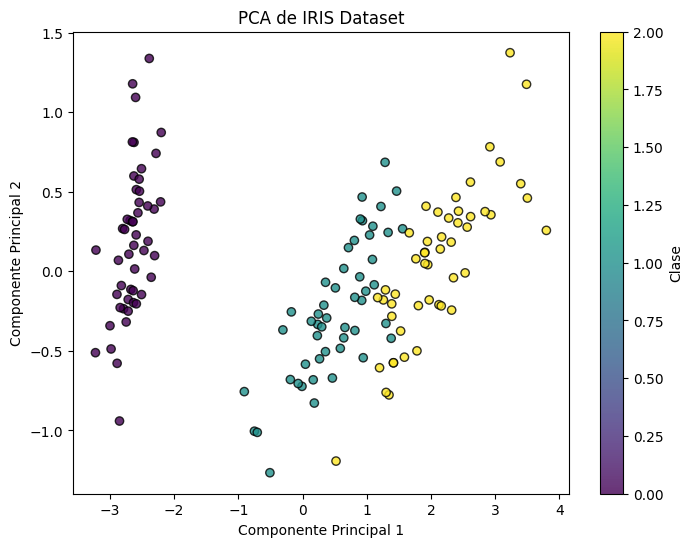

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Paso 1: Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Paso 2: Crear y ajustar un objeto PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar los datos transformados por PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.8)
plt.title('PCA de IRIS Dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clase')
plt.show()

El hiperparámetro n_components nos permite seleccionar cuántas dimensiones queremos que tenga el conjunto de datos resultante. En el ejemplo expuesto, existen 4 dimensiones: petal_length, petal_width, sepal_length y sepal_width. Después transformamos el espacio en uno en dos dimensiones, con únicamente dos características.